

---

#### Name: 陳永承
#### Student ID: 0712534

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
from sklearn.metrics import recall_score
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
def sdev(PL):
    M=sum(PL)/len(PL)
    D=0
    for i in range(len(PL)):
        diff=pow((PL[i]-M),2)
        D=D+diff
    D=D/len(PL)
    D=pow(D,0.5)
    return D

### 1.Data Input

In [3]:
"""
iris
"""
ir='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
ir_column_names=['sepal length','sepal width','petal length','petal width','class']
iris = pd.read_csv(ir, header=None, names=ir_column_names)

In [4]:
iris_feature=iris.drop(columns='class')
iris_label=iris['class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris_feature=np.array(iris_feature,dtype=int)
iris_label=np.array(iris_label)

In [5]:
"""
mushroom
"""
M_column_names=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(url, header=None, names=M_column_names)

In [6]:
X = mushrooms.drop(columns='class') 
y = mushrooms['class'].replace({'p':0, 'e':1})
takeF=np.array(X)
takeL=np.array(y)


### 2.Data Visualization

In [7]:
"""
For mushroom dataset
"""
worde=[]
wordp=[]
for i in range(27):
    worde.append(0)
    wordp.append(0)
for j in range(22):
    print(M_column_names[j+1])
    for i in range(len(takeF)):
        if(y[i]==1):
            
            if(takeF[i][j]=='?'):
                worde[26]=worde[26]+1
            else:
            
                w=ord(takeF[i][j])-ord('a')
                worde[w]=worde[w]+1
        elif (y[i]==0):
            
            if(takeF[i][j]=='?'):
                wordp[26]=wordp[26]+1
            else:
            
                w=ord(takeF[i][j])-ord('a')
                wordp[w]=wordp[w]+1
                
    print('e:',end='\t')
    for i in range(27):

        if(worde[i]!=0 or wordp[i]!=0):
            if i==26:
                print('?\t'+str(worde[i]),end='|')
                continue
            print(chr(ord('a')+i)+'\t'+str(worde[i]),end='|')
            
    print()
    print('p:',end='\t')
    for i in range(27):
        if(wordp[i]!=0 or worde[i]!=0):
            if i==26:
                print('?\t'+str(wordp[i]),end='|')
                wordp[i]=0
                worde[i]=0
                continue
            print(chr(ord('a')+i)+'\t'+str(wordp[i]),end='|')
            wordp[i]=0
            worde[i]=0
    
    print()

cap-shape
e:	b	404|c	0|f	1596|k	228|s	32|x	1948|
p:	b	48|c	4|f	1556|k	600|s	0|x	1708|
cap-surface
e:	f	1560|g	0|s	1144|y	1504|
p:	f	760|g	4|s	1412|y	1740|
cap-color
e:	b	48|c	32|e	624|g	1032|n	1264|p	56|r	16|u	16|w	720|y	400|
p:	b	120|c	12|e	876|g	808|n	1020|p	88|r	0|u	0|w	320|y	672|
bruises?
e:	f	1456|t	2752|
p:	f	3292|t	624|
odor
e:	a	400|c	0|f	0|l	400|m	0|n	3408|p	0|s	0|y	0|
p:	a	0|c	192|f	2160|l	0|m	36|n	120|p	256|s	576|y	576|
gill-attachment
e:	a	192|f	4016|
p:	a	18|f	3898|
gill-spacing
e:	c	3008|w	1200|
p:	c	3804|w	112|
gill-size
e:	b	3920|n	288|
p:	b	1692|n	2224|
gill-color
e:	b	0|e	96|g	248|h	204|k	344|n	936|o	64|p	852|r	0|u	444|w	956|y	64|
p:	b	1728|e	0|g	504|h	528|k	64|n	112|o	0|p	640|r	24|u	48|w	246|y	22|
stalk-shape
e:	e	1616|t	2592|
p:	e	1900|t	2016|
stalk-root
e:	b	1920|c	512|e	864|r	192|?	720|
p:	b	1856|c	44|e	256|r	0|?	1760|
stalk-surface-above-ring
e:	f	408|k	144|s	3640|y	16|
p:	f	144|k	2228|s	1536|y	8|
stalk-surface-below-ring
e:	f	456|k	144|s	3400|y	208|
p:	f	144|k	2

In [8]:
"""
For iris dataset
"""
iris_0_sl=[];iris_0_sw=[];iris_0_pl=[];iris_0_pw=[]
iris_1_sl=[];iris_1_sw=[];iris_1_pl=[];iris_1_pw=[]
iris_2_sl=[];iris_2_sw=[];iris_2_pl=[];iris_2_pw=[]
iris_c=[0,0,0]
I_class=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(len(iris_label)):
    if iris_label[i]==0:
        iris_c[0]=iris_c[0]+1
        iris_0_sl.append(iris_feature[i][0])
        iris_0_sw.append(iris_feature[i][1])
        iris_0_pl.append(iris_feature[i][2])
        iris_0_pw.append(iris_feature[i][3])
    elif iris_label[i]==1:
        iris_c[1]=iris_c[1]+1
        iris_1_sl.append(iris_feature[i][0])
        iris_1_sw.append(iris_feature[i][1])
        iris_1_pl.append(iris_feature[i][2])
        iris_1_pw.append(iris_feature[i][3])
    elif iris_label[i]==2:
        iris_c[2]=iris_c[2]+1
        iris_2_sl.append(iris_feature[i][0])
        iris_2_sw.append(iris_feature[i][1])
        iris_2_pl.append(iris_feature[i][2])
        iris_2_pw.append(iris_feature[i][3])

print('\t\t\t'+I_class[0]+' \t'+I_class[1]+' \t'+I_class[2])
print('number of class:\t'+str(iris_c[0])+'\t\t'+str(iris_c[1])+'\t\t\t'+str(iris_c[2]))
print('sepal length average:\t'+str(round(sum(iris_0_sl)/iris_c[0],6))+'\t\t'+str(round(sum(iris_1_sl)/iris_c[1],6))+'\t\t\t'+str(round(sum(iris_2_sl)/iris_c[2],6)))
print('sepal length deviation:\t'+str(round(sdev(iris_0_sl),6))+'\t'+str(round(sdev(iris_1_sl),6))+'\t\t'+str(round(sdev(iris_2_sl),6)))
print('sepal width average:\t'+str(round(sum(iris_0_sw)/iris_c[0],6))+'\t\t'+str(round(sum(iris_1_sw)/iris_c[1],6))+'\t\t\t'+str(round(sum(iris_2_sw)/iris_c[2],6)))
print('sepal width deviation:\t'+str(round(sdev(iris_0_sw),6))+'\t'+str(round(sdev(iris_1_sw),6))+'\t\t'+str(round(sdev(iris_2_sw),6)))

print('petal length average:\t'+str(round(sum(iris_0_pl)/iris_c[0],6))+'\t\t'+str(round(sum(iris_1_pl)/iris_c[1],6))+'\t\t\t'+str(round(sum(iris_2_pl)/iris_c[2],6)))
print('petal length deviation:\t'+str(round(sdev(iris_0_pl),6))+'\t\t'+str(round(sdev(iris_1_pl),6))+'\t\t'+str(round(sdev(iris_2_pl),6)))
print('petal width average:\t'+str(round(sum(iris_0_pw)/iris_c[0],6))+'\t\t'+str(round(sum(iris_1_pw)/iris_c[1],6))+'\t\t\t'+str(round(sum(iris_2_pw)/iris_c[2],6)))
print('petal width deviation:\t'+str(round(sdev(iris_0_pw),6))+'\t\t'+str(round(sdev(iris_1_pw),6))+'\t\t\t'+str(round(sdev(iris_2_pw),6)))


			Iris-setosa 	Iris-versicolor 	Iris-virginica
number of class:	50		50			50
sepal length average:	4.6		5.48			6.08
sepal length deviation:	0.489898	0.574108		0.658483
sepal width average:	3.04		2.32			2.58
sepal width deviation:	0.344093	0.466476		0.493559
petal length average:	1.0		3.82			5.1
petal length deviation:	0.0		0.477074		0.574456
petal width average:	0.0		1.0			1.58
petal width deviation:	0.0		0.0			0.493559


### 3.Data Preprocessing

In [9]:
"""
Drop features with any missing value.
"""
k=mushrooms['stalk-root']
mushrooms = pd.read_csv(url, header=None, names=M_column_names)
X = mushrooms
for i in range(len(k)):
    if k[i]=='?':
        X=X.drop(index=i)
y = X['class'].replace({'p':0, 'e':1})
X = X.drop(columns='class') 
takeF=np.array(X)
takeL=np.array(y)

"""
Transform data format and shape so your model can process them.
"""
for i in range(len(takeF)):
    for j in range(len(takeF[0])):
        takeF[i][j]=int(ord(takeF[i][j])-ord('a'))
        
"""
Shuffle the data.
"""
takeF, y = shuffle(takeF, y, random_state=0)
iris_feature, iris_label = shuffle(iris_feature, iris_label, random_state=0)

### 5.Train-Test-Split 

In [10]:
"""
Holdout validation -Mushroom
"""
M_F_train, M_F_test, M_L_train, M_L_test = train_test_split(takeF, y, test_size=0.3)



"""
K-fold cross-validation -Mushroom
"""
M_K_train_L_1=y[:int(len(takeF)*2/3)]
M_K_train_F_1=takeF[:int(len(takeF)*2/3)]
M_K_test_L_1=y[int(len(takeF)*2/3):]
M_K_test_F_1=takeF[int(len(takeF)*2/3):]

M_K_train_L_2=np.concatenate((y[0:int(len(takeF)*1/3)],y[int(len(takeF)*2/3):]),axis=0)
M_K_train_F_2=np.concatenate((takeF[0:int(len(takeF)*1/3)],takeF[int(len(takeF)*2/3):]),axis=0)
M_K_test_L_2=y[int(len(takeF)*1/3):int(len(takeF)*2/3)]
M_K_test_F_2=takeF[int(len(takeF)*1/3):int(len(takeF)*2/3)]

M_K_train_L_3=y[int(len(takeF)*1/3):]
M_K_train_F_3=takeF[int(len(takeF)*1/3):]
M_K_test_L_3=y[:int(len(takeF)*1/3)]
M_K_test_F_3=takeF[:int(len(takeF)*1/3)]

"""
Holdout validation -iris
"""
irisF_train,irisF_test,irisL_train,irisL_test=train_test_split(iris_feature,iris_label,test_size=0.3)
"""
K-fold cross-validation -iris
"""
I_K_train_L_1=iris_label[:int(len(iris_label)*2/3)]
I_K_train_F_1=iris_feature[:int(len(iris_label)*2/3)]
I_K_test_L_1=iris_label[int(len(iris_label)*2/3):]
I_K_test_F_1=iris_feature[int(len(iris_label)*2/3):]

I_K_train_L_2=np.concatenate((iris_label[0:int(len(iris_label)*1/3)],iris_label[int(len(iris_label)*2/3):]),axis=0)
I_K_train_F_2=np.concatenate((iris_feature[0:int(len(iris_label)*1/3)],iris_feature[int(len(iris_label)*2/3):]),axis=0)
I_K_test_L_2=iris_label[int(len(iris_label)*1/3):int(len(iris_label)*2/3)]
I_K_test_F_2=iris_feature[int(len(iris_label)*1/3):int(len(iris_label)*2/3)]

I_K_train_L_3=iris_label[:int(len(iris_label)*1/3)]
I_K_train_F_3=iris_feature[:int(len(iris_label)*1/3)]
I_K_test_L_3=iris_label[int(len(iris_label)*1/3):]
I_K_test_F_3=iris_feature[int(len(iris_label)*1/3):]

### 4.Model Construction

In [11]:
"""
Mushroom - K-fold cross-validation
no smoothing
"""
mush_K1_NS_model=CategoricalNB(alpha=1.0e-10)
mush_K1_NS_model.fit(M_K_train_F_1,M_K_train_L_1)
mush_K2_NS_model=CategoricalNB(alpha=1.0e-10)
mush_K2_NS_model.fit(M_K_train_F_2,M_K_train_L_2)
mush_K3_NS_model=CategoricalNB(alpha=1.0e-10)
mush_K3_NS_model.fit(M_K_train_F_3,M_K_train_L_3)
"""
Mushroom - Holdout validation
no smoothing
"""
mush_NS_model=CategoricalNB(alpha=1.0e-10)
mush_NS_model.fit(M_F_train,M_L_train)

"""
Mushroom - K-fold cross-validation
Laplace smoothing
"""
mush_K1_LS_model=CategoricalNB(alpha=1.0)
mush_K1_LS_model.fit(M_K_train_F_1,M_K_train_L_1)
mush_K2_LS_model=CategoricalNB(alpha=1.0)
mush_K2_LS_model.fit(M_K_train_F_2,M_K_train_L_2)
mush_K3_LS_model=CategoricalNB(alpha=1.0)
mush_K3_LS_model.fit(M_K_train_F_3,M_K_train_L_3)

"""
Mushroom - Holdout validation
Laplace smoothing
"""
mush_LS_model=CategoricalNB(alpha=1.0)  #Laplace smoothing
mush_LS_model.fit(M_F_train,M_L_train)

"""
iris - K-fold cross-validation
"""
iris_K1_modelG=GaussianNB()
iris_K1_modelG.fit(I_K_train_F_1,I_K_train_L_1)
iris_K2_modelG=GaussianNB()
iris_K2_modelG.fit(I_K_train_F_2,I_K_train_L_2)
iris_K3_modelG=GaussianNB()
iris_K3_modelG.fit(I_K_train_F_3,I_K_train_L_3)

"""
iris - Holdout validation
"""
iris_modelG=GaussianNB()
iris_modelG.fit(irisF_train,irisL_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 6.Results

In [12]:
M_k1=mush_K1_NS_model.predict(M_K_test_F_1)
M_k2=mush_K2_NS_model.predict(M_K_test_F_2)
M_k3=mush_K3_NS_model.predict(M_K_test_F_3)
#
M_H=mush_NS_model.predict(M_F_test)
#
M_k1_LS=mush_K1_LS_model.predict(M_K_test_F_1)
M_k2_LS=mush_K2_LS_model.predict(M_K_test_F_2)
M_k3_LS=mush_K3_LS_model.predict(M_K_test_F_3)
#
M_H_LS=mush_LS_model.predict(M_F_test)
#
I_k1=iris_K1_modelG.predict(I_K_test_F_1)
I_k2=iris_K2_modelG.predict(I_K_test_F_2)
I_k3=iris_K2_modelG.predict(I_K_test_F_3)
#
I_H=iris_modelG.predict(irisF_test)

<function matplotlib.pyplot.show(*args, **kw)>

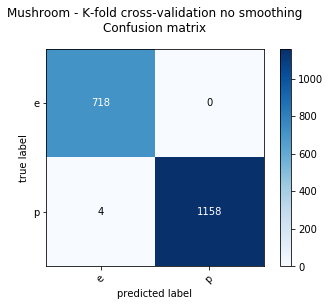

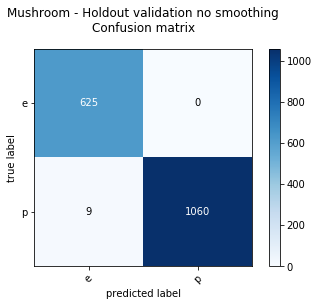

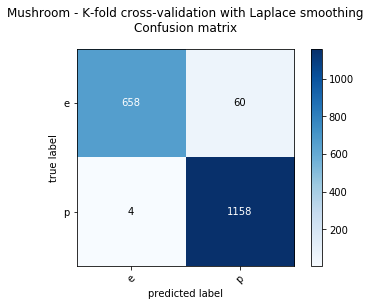

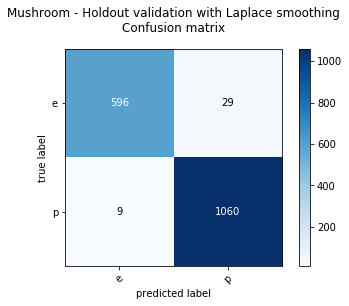

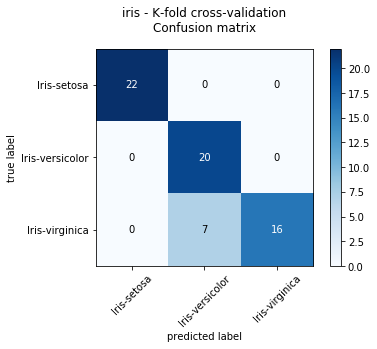

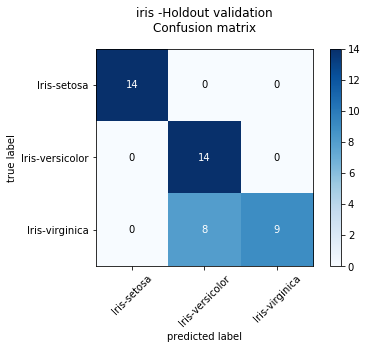

In [13]:
"""
Confusion matrix
"""
column_name=['e','p']
#row_name=['Guess-e','Guess-p']
#'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2
I_column_name=['Iris-setosa','Iris-versicolor','Iris-virginica']
#I_row_name=['Guess-setosa','Guess-versicolor','Guess-virginica']
"""
Mushroom - K-fold cross-validation
no smoothing
"""
M_K1=confusion_matrix(M_K_test_L_1, M_k1)
M_K2= confusion_matrix(M_K_test_L_2, M_k2)
M_K3 = confusion_matrix(M_K_test_L_3, M_k3)
M_K_NS=confusion_matrix(M_K_test_L_1, M_k1)
for i in range(2):
    for j in range(2):
        M_K_NS[i][j]=(M_K1[i][j]+M_K2[i][j]+M_K3[i][j])/3
figuer,ax=plot_confusion_matrix(conf_mat=M_K_NS,show_absolute=True,show_normed=False,colorbar=True,class_names=column_name)
plt.title('Mushroom - K-fold cross-validation no smoothing\nConfusion matrix')
plt.show
"""
Mushroom - Holdout validation
no smoothing
"""
M_H_NS=confusion_matrix(M_L_test, M_H)
figuer,ax=plot_confusion_matrix(conf_mat=M_H_NS,show_absolute=True,show_normed=False,colorbar=True,class_names=column_name)
plt.title('Mushroom - Holdout validation no smoothing\nConfusion matrix')
plt.show
"""
Mushroom - K-fold cross-validation
Laplace smoothing
"""
M_K1_LS=confusion_matrix(M_K_test_L_1, M_k1_LS)
M_K2_LS= confusion_matrix(M_K_test_L_2, M_k2_LS)
M_K3_LS = confusion_matrix(M_K_test_L_3, M_k3_LS)
M_K_LS=confusion_matrix(M_K_test_L_1, M_k1_LS)
for i in range(2):
    for j in range(2):
        M_K_LS[i][j]=(M_K1_LS[i][j]+M_K2_LS[i][j]+M_K3_LS[i][j])/3
figuer,ax=plot_confusion_matrix(conf_mat=M_K_LS,show_absolute=True,show_normed=False,colorbar=True,class_names=column_name)
plt.title('Mushroom - K-fold cross-validation with Laplace smoothing\nConfusion matrix')
plt.show

"""
Mushroom - Holdout validation
Laplace smoothing
"""
M_H_LS = confusion_matrix(M_L_test, M_H_LS)
figuer,ax=plot_confusion_matrix(conf_mat=M_H_LS,show_absolute=True,show_normed=False,colorbar=True,class_names=column_name)
plt.title('Mushroom - Holdout validation with Laplace smoothing\nConfusion matrix')
plt.show

"""
iris - K-fold cross-validation
"""
I_K_m=confusion_matrix(I_K_test_L_1,I_k1)
I_K1_m=confusion_matrix(I_K_test_L_1,I_k1)
I_K2_m=confusion_matrix(I_K_test_L_2,I_k2)
I_K3_m=confusion_matrix(I_K_test_L_3,I_k3)
for i in range(3):
    for j in range(3):
        I_K_m[i][j]=round((I_K1_m[i][j]+I_K2_m[i][j]+I_K3_m[i][j])/3,2)
figuer,ax=plot_confusion_matrix(conf_mat=I_K_m,show_absolute=True,show_normed=False,colorbar=True,class_names=I_column_name)
plt.title('iris - K-fold cross-validation\nConfusion matrix')
plt.show

"""
iris - Holdout validation
"""
I_H_m=confusion_matrix(irisL_test,I_H)
figuer,ax=plot_confusion_matrix(conf_mat=I_H_m,show_absolute=True,show_normed=False,colorbar=True,class_names=I_column_name)
plt.title('iris -Holdout validation\nConfusion matrix')
plt.show

In [14]:
"""
Accuracy / Sensitivity(Recall) / Precision
"""
M_k1=mush_K1_NS_model.predict(M_K_test_F_1)
M_k2=mush_K2_NS_model.predict(M_K_test_F_2)
M_k3=mush_K3_NS_model.predict(M_K_test_F_3)
#
M_H=mush_NS_model.predict(M_F_test)
#
M_k1_LS=mush_K1_LS_model.predict(M_K_test_F_1)
M_k2_LS=mush_K2_LS_model.predict(M_K_test_F_2)
M_k3_LS=mush_K3_LS_model.predict(M_K_test_F_3)
#
M_H_LS=mush_LS_model.predict(M_F_test)
#
I_k1=iris_K1_modelG.predict(I_K_test_F_1)
I_k2=iris_K2_modelG.predict(I_K_test_F_2)
I_k3=iris_K2_modelG.predict(I_K_test_F_3)
#
I_H=iris_modelG.predict(irisF_test)
"""
Mushroom - K-fold cross-validation
no smoothing
"""
M_K_NS_score=(mush_K1_NS_model.score(M_K_test_F_1,M_K_test_L_1)+mush_K2_NS_model.score(M_K_test_F_2,M_K_test_L_2)+mush_K3_NS_model.score(M_K_test_F_3,M_K_test_L_3))/3
print('Mushroom - K-fold cross-validation without smoothing\nAccuracy = '+str(M_K_NS_score))

M_K_NS_r=recall_score(M_K_test_L_1,M_k1, average=None)
r1=recall_score(M_K_test_L_1,M_k1, average=None)
r2=recall_score(M_K_test_L_2,M_k2, average=None)
r3=recall_score(M_K_test_L_3,M_k3, average=None)
for i in range(2):
    M_K_NS_r[i]=(r1[i]+r2[i]+r3[i])/3
print('Sensitivity:\te= '+str(M_K_NS_r[0])+'\t\tp= '+str(M_K_NS_r[1]))

M_K_NS_p=precision_score(M_K_test_L_1, M_k1,average=None)
M_K_NS_p1=precision_score(M_K_test_L_1, M_k1,average=None)
M_K_NS_p2=precision_score(M_K_test_L_2, M_k2,average=None)
M_K_NS_p3=precision_score(M_K_test_L_3, M_k3,average=None)
for i in range(2):
    M_K_NS_p[i]=(M_K_NS_p1[i]+M_K_NS_p2[i]+M_K_NS_p3[i])/3
print('Precision:\te= '+str(round(M_K_NS_p[0],6))+'\tp= '+str(round((M_K_NS_p[1]),6)))
print()
"""
Mushroom - Holdout validation
no smoothing
"""
M_H_NS_score=mush_NS_model.score(M_F_test,M_L_test)
M_H_NS_r=recall_score(M_L_test,M_H, average=None)
print('Mushroom - Holdout validation without smoothing\nAccuracy = '+str(M_H_NS_score))

print('Sensitivity:\te= '+str(M_H_NS_r[0])+'\t\tp= '+str(M_H_NS_r[1]))


M_H_NS_p=precision_score(M_L_test, M_H,average=None)
print('Precision:\te= '+str(round(M_H_NS_p[0],6))+'\tp= '+str(round((M_H_NS_p[1]),6)))
print()
"""
Mushroom - K-fold cross-validation
Laplace smoothing
"""
M_K_LS_score=(mush_K1_LS_model.score(M_K_test_F_1,M_K_test_L_1)+mush_K2_LS_model.score(M_K_test_F_2,M_K_test_L_2)+mush_K3_LS_model.score(M_K_test_F_3,M_K_test_L_3))/3
print('Mushroom - K-fold cross-validation with Laplace smoothing\nAccuracy = '+str(M_K_LS_score))

M_K_LS_r=recall_score(M_K_test_L_1,M_k1_LS, average=None)
LS_r1=recall_score(M_K_test_L_1,M_k1_LS, average=None)
LS_r2=recall_score(M_K_test_L_2,M_k2_LS, average=None)
LS_r3=recall_score(M_K_test_L_3,M_k3_LS, average=None)
for i in range(2):
    M_K_LS_r[i]=(LS_r1[i]+LS_r2[i]+LS_r3[i])/3
print('Sensitivity:\te= '+str(M_K_LS_r[0])+'\tp= '+str(M_K_LS_r[1]))

M_K_LS_p=precision_score(M_K_test_L_1, M_k1_LS,average=None)
M_K_LS_p1=precision_score(M_K_test_L_1, M_k1_LS,average=None)
M_K_LS_p2=precision_score(M_K_test_L_2, M_k2_LS,average=None)
M_K_LS_p3=precision_score(M_K_test_L_3, M_k3_LS,average=None)
for i in range(2):
    M_K_LS_p[i]=(M_K_LS_p1[i]+M_K_LS_p2[i]+M_K_LS_p3[i])/3
print('Precision:\te= '+str(M_K_LS_p[0])+'\tp= '+str(round((M_K_LS_p[1]),6)))
print()
"""
Mushroom - Holdout validation
Laplace smoothing
"""
M_H_LS_score=mush_LS_model.score(M_F_test,M_L_test)
print('Mushroom - Holdout validation with Laplace smoothing\nAccuracy = '+str(M_H_LS_score))

M_H_LS_r=recall_score(M_L_test,M_H_LS, average=None)
print('Sensitivity:\te= '+str(M_H_LS_r[0])+'\tp= '+str(M_H_LS_r[1]))

M_H_LS_p=precision_score(M_L_test, M_H_LS,average=None)
print('Precision:\te= '+str(M_H_LS_p[0])+'\tp= '+str(round((M_H_LS_p[1]),6)))
print()
"""
iris - K-fold cross-validation
"""
I_K_score=(iris_K1_modelG.score(I_K_test_F_1,I_K_test_L_1)+iris_K2_modelG.score(I_K_test_F_2,I_K_test_L_2)+iris_K3_modelG.score(I_K_test_F_3,I_K_test_L_3))/3
print('iris - K-fold cross-validation\nAccuracy = '+str(I_K_score))

I_K_r=recall_score(I_K_test_L_1,I_k1, average=None)
I_r1=recall_score(I_K_test_L_1,I_k1, average=None)
I_r2=recall_score(I_K_test_L_2,I_k2, average=None)
I_r3=recall_score(I_K_test_L_3,I_k3, average=None)
for i in range(3):
    I_K_r[i]=(I_r1[i]+I_r2[i]+I_r3[i])/3
print('Sensitivity:\tsetosa= '+str(I_K_r[0])+'\tversicolor= '+str(I_K_r[1])+' \tvirginica= '+str(round(I_K_r[2],6)))

I_K_p=precision_score(I_K_test_L_1, I_k1,average=None)
I_K_p1=precision_score(I_K_test_L_1, I_k1,average=None)
I_K_p2=precision_score(I_K_test_L_2, I_k2,average=None)
I_K_p3=precision_score(I_K_test_L_3, I_k3,average=None)
for i in range(3):
    I_K_p[i]=(I_K_p1[i]+I_K_p2[i]+I_K_p3[i])/3
print('Precision:\tsetosa= '+str(I_K_p[0])+'\tversicolor= '+str(round((I_K_p[1]),6))+' \tvirginica= '+str(I_K_p[2]))
print()
"""
iris - Holdout validation
"""
I_H_score=iris_modelG.score(irisF_test,irisL_test)
print('iris - Holdout validation\nAccuracy = '+str(I_H_score))

I_H_r=recall_score(irisL_test,I_H, average=None)
print('Sensitivity:\tsetosa= '+str(I_H_r[0])+'\tversicolor= '+str(I_H_r[1])+' \tvirginica= '+str(round(I_H_r[2],6)))

I_H_p=precision_score(irisL_test, I_H,average=None)
print('Precision:\tsetosa= '+str(I_H_p[0])+'\tversicolor= '+str(round((I_H_p[1]),6))+' \tvirginica= '+str(I_H_p[2]))

Mushroom - K-fold cross-validation without smoothing
Accuracy = 0.9975195209548362
Sensitivity:	e= 1.0		p= 0.9959842686759277
Precision:	e= 0.993538	p= 1.0

Mushroom - Holdout validation without smoothing
Accuracy = 0.9946871310507674
Sensitivity:	e= 1.0		p= 0.9915809167446211
Precision:	e= 0.985804	p= 1.0

Mushroom - K-fold cross-validation with Laplace smoothing
Accuracy = 0.9652744232978027
Sensitivity:	e= 0.9158687943262412	p= 0.9959842686759277
Precision:	e= 0.9929395022183841	p= 0.950157

Mushroom - Holdout validation with Laplace smoothing
Accuracy = 0.9775678866587958
Sensitivity:	e= 0.9536	p= 0.9915809167446211
Precision:	e= 0.9851239669421488	p= 0.97337

iris - K-fold cross-validation
Accuracy = 0.89
Sensitivity:	setosa= 1.0	versicolor= 1.0 	virginica= 0.696825
Precision:	setosa= 1.0	versicolor= 0.741486 	virginica= 1.0

iris - Holdout validation
Accuracy = 0.8222222222222222
Sensitivity:	setosa= 1.0	versicolor= 1.0 	virginica= 0.529412
Precision:	setosa= 1.0	versicolor= 0.63

______
### 7.Comparison & Conclusion 
。k-fold v.s. holdout<br>
在沒有smoothing的狀況時，無論用k-fold或holdout的精準度都相當高(高於99%)<br>
在有Laplace smoothing的狀況時，2者精準度也很高(96%左右)，但用k-fold會比較高一些<br>
在iris的數據中，k-fold在精準度上有稍加明確的比holdout高(k-fold:89% ; holdout:84%)<br>
因此推斷，因為k-fold是將訓練拆分3次再取平均，所以k-fold在訓練上會將全部的資料放入訓練，每筆資料相當於貢獻2/3<br>
而holdout是70%的資料貢獻全部，但有30%的資料沒有貢獻該次訓練。<br>
導致測試時k-fold的結果會比較準確。<br>
<br>
。Laplace smoothing v.s. Without Laplace smoothing<br>
若有一特徵未出現過，P(features|label)會變為0，這樣就會導致P(label|features)也為0，這種情況是不對的<br>
Laplace在數據足夠大時不會造成太大的影響，且Laplace smoothing可以解決其一特徵為0的情況<br>
而在本次訓練中，Laplace smoothing後的精準度有些微的降低，推測是數據量仍不夠多，使影響有稍加明顯的變化<br>
<br>
。iris v.s. mushroom<br>
iris訓練的精準度明顯的比mushroom低<br>
推測是因為iris的數據明顯的比mushroom少，且mushroom是分成2類，但iris是分成3類。導致iris的精準度不高<br>

__________________________________________________________________________
### 8.Questions

without Laplace smoothing


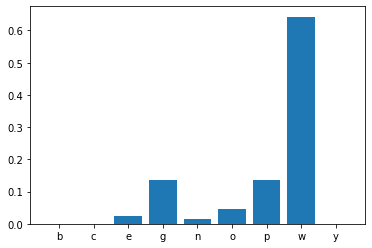

with Laplace smoothing


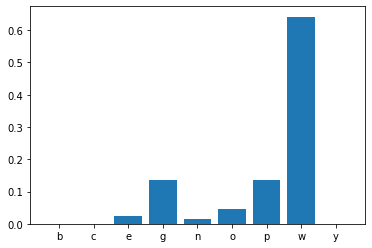

without Laplace smoothing P(X=b|Y):0.0
with Laplace smoothing P(X=b|Y):0.00023713540431586437


In [15]:
"""
For the mushroom dataset
"""

"""
stalk-color-below-ring
e:	b	0|c	0|e	96|g	576|n	64|o	192|p	576|w	2704|y	0|
"""
Q1_c=['b','c','e','g','n','o','p','w','y']
N_LS=[0.0,0.0,96.0,576.0,64.0,192.0,576.0,2704.0,0.0]
K=1
T=sum(N_LS)
for i in range(len(N_LS)):
    N_LS[i]=N_LS[i]/T
print('without Laplace smoothing')
W=plt.bar(Q1_c,N_LS)
plt.show(W)
LS=[0.0,0.0,96.0,576.0,64.0,192.0,576.0,2704.0,0.0]
T=sum(LS)
for i in range(len(LS)):
    LS[i]=(LS[i]+K)/(T+K*9)

print('with Laplace smoothing')
L=plt.bar(Q1_c,LS)
plt.show(L)

print('without Laplace smoothing P(X=b|Y):'+str(N_LS[0]))
print('with Laplace smoothing P(X=b|Y):'+str(LS[0]))

1. μ= 4.26 and σ= 0.4651881339845204

2. graph of probability density function


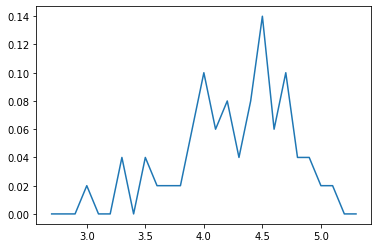

In [16]:
"""
For the iris dataset
"""
iris_F=iris.drop(columns='class')
iris_L=iris['class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris_F=np.array(iris_F,dtype=float)
iris_L=np.array(iris_L)
I_T=0
PL=[]
for i in range(len(iris_label)):
    if iris_L[i]==1:
        I_T=I_T+1
        PL.append(iris_F[i][2])
Q2_c=[]
pl_I=[]
for i in range(27):
    Q2_c.append(round(2.7+i/10,1))
    pl_I.append(0)

for i in range(len(PL)):
    index=round((PL[i]-2.7)*10,0)
    pl_I[int(index)]=pl_I[int(index)]+1
    
M=sum(PL)/len(PL)
D=sdev(PL)

for i in range(len(pl_I)):
    pl_I[i]=pl_I[i]/len(PL)
    
print('1. μ= '+str(M)+ ' and σ= '+str(float(D))+'\n')
print('2. graph of probability density function')
plt.plot(Q2_c,pl_I)
plt.show()